In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import xlrd
import collections
%matplotlib inline


import umap
import gower
import sys

/home/victor/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
/home/victor/.local/lib/python3.6/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


# Conversión de XLS to CSV:

In [170]:
files =  [ 'AA1 1 listado escuelas Jalisco xls.xls',
           'AA2  indicadores de eficiencia por escuela Jalisco xls.xls',
           'AA3 planea_basica_por_escuela_Jalisco.xls'
           'AA4 delitos municipios Jalisco.xlsx',
           'AA5 1  Indice de marginacion por municipio Jalisco xls.xlsx',
           'AA6 1 madres adolescentes por municipio Jalisco 2019.xlsx',
           'AA6 2 poblacion indigena municipio Jalisco.xls',
           'AA7 1  socio economica por colonia2010 ZMG Jalisco.xls',
           'AA7 2 socio economica por colonia ciudades medias Jalisco.xls',
           'AA8 1 Censo Jalisco 2020 xls.xls',
           'AA8 2 diccionario Censo Jalisco 2020.xls']

In [171]:
new_files = ['AA1 1 listado escuelas Jalisco.csv',#0
           'AA2  indicadores de eficiencia por escuela Jalisco.csv',#1
           'AA3 planea_basica_por_escuela_Jalisco.csv',#2
           'AA4 delitos municipios Jalisco.csv',#3
           'AA5 1  Indice de marginacion por municipio Jalisco.csv',#4
           'AA6 1 madres adolescentes por municipio Jalisco 2019.csv',#5
           'AA6 2 poblacion indigena municipio Jalisco.csv',#6
           'AA7 1  socio economica por colonia2010 ZMG Jalisco.csv',#7
           'AA7 2 socio economica por colonia ciudades medias Jalisco.csv',#8
           'AA8 1 Censo Jalisco 2020.csv',#9
    
]

In [34]:
def convert_csv(names_orig:list, names_new:list):
    
    for i in range(0, len(names_orig)):
        
        df = pd.read_excel(names_orig[i])
        df.to_csv(names_new[i], index=False)
    
    

In [174]:
convert_csv(['AA3 planea_basica_por_escuela_Jalisco.xls'], ['AA3 planea_basica_por_escuela_Jalisco.csv'])

In [178]:
#df = pd.read_excel('AA3 planea_basica_por_escuela_Jalisco.xls')
#df.head()

""


# EXPLORACIÓN DE DATASETS:

In [184]:
df = pd.read_csv(new_files[3]) #pos 3: una fila de Guadalajara, pos6 : Hay mucha informacion de Guadalajara, pos7: No hay nada
print("shape :",df.shape)
#df.iloc[:50,:]

shape : (126, 19)


In [185]:
df.head()

,Clave municipal,Municipio,ABUSO SEXUAL INFANTIL,FEMINICIDIO,HOMICIDIO DOLOSO,LESIONES DOLOSAS,ROBO A BANCOS,ROBO A CARGA PESADA,ROBO A CUENTAHABIENTES,ROBO A INT DE VEHICULOS,ROBO A NEGOCIO,ROBO A PERSONA,ROBO A VEHICULOS PARTICULARES,ROBO CASA HABITACION,ROBO DE AUTOPARTES,ROBO DE MOTOCICLETA,VIOLACION,VIOLENCIA INTRAFAMILIAR,Total general
0,1,ACATIC,5,1,0,19,0,1,0,1,3,2,12,12,0,15,0,19,90
1,2,ACATLÁN DE JUÁREZ,6,0,14,48,0,26,3,7,10,24,41,51,0,13,0,42,285
2,3,AHUALULCO DE MERCADO,4,0,0,36,0,2,0,1,3,5,8,6,0,10,1,15,91
3,4,AMACUECA,0,0,2,2,0,0,0,0,0,0,1,0,0,0,0,1,6
4,5,AMATITÁN,4,0,2,15,0,1,0,2,3,1,10,10,0,0,1,7,56


In [180]:
#counter = collections.Counter(df['NOMBRE MUNICIPIO'].to_list())
#counter

In [77]:
#df = df.drop(df.columns[0], axis=1)
#df.iloc[:15,:]
#df.to_csv(new_files[4], index =False)

In [186]:
df8 = df.loc[df['Municipio'] == 'GUADALAJARA']
df8.head()

,Clave municipal,Municipio,ABUSO SEXUAL INFANTIL,FEMINICIDIO,HOMICIDIO DOLOSO,LESIONES DOLOSAS,ROBO A BANCOS,ROBO A CARGA PESADA,ROBO A CUENTAHABIENTES,ROBO A INT DE VEHICULOS,ROBO A NEGOCIO,ROBO A PERSONA,ROBO A VEHICULOS PARTICULARES,ROBO CASA HABITACION,ROBO DE AUTOPARTES,ROBO DE MOTOCICLETA,VIOLACION,VIOLENCIA INTRAFAMILIAR,Total general
38,39,GUADALAJARA,369,6,513,2212,14,104,493,1656,6865,7717,9526,1952,1452,858,101,2007,35845


In [187]:
#df8.to_csv('A4_delitosGuad.csv', index=False) #A71_SocioEconGuad.csv, A62_PobIndigenaGuad.csv, A4_delitosGuad

# Exploración Part2:

In [188]:
!ls

 A2_indicEficEscuelaGuad.csv  'AA3 planea_basica_por_escuela_Jalisco.xls'
 A4_delitosGuad.csv	      'AA4 delitos municipios Jalisco.csv'
 A51_IndicMargGuad.csv	      'DATA FILES CSV'
 A61_MadresAdolescGuad.csv    'FILES XLS'
 A62_PobIndigenaGuad.csv      'Hackathon Desercion Escolar v1.docx'
 A71_SocioEconGuad.csv	       Hackaton.ipynb
 A8_MuniGuad.csv


In [3]:
subsets = [ 'A2_indicEficEscuelaGuad.csv',#0_1728rows_18cols
            'A4_delitosGuad.csv',#1_1rows_19cols
            'A51_IndicMargGuad.csv',#2_1rows_15coles
            'A61_MadresAdolescGuad.csv',#3_1rows_18cols
            'A62_PobIndigenaGuad.csv',#4_1rows_18cols
            'A71_SocioEconGuad.csv',#5_584rows_187Cols
            'A8_MuniGuad.csv'#6_2rows_232cols
          ]

In [30]:
df = pd.read_csv(subsets[0])
print("shape: ", df.shape)
df.head()

shape:  (1728, 11)


,CLAVE_CT,NOM_TURNO,DOMICILIO,COLONIA,SOSTENIMIENTO,NIVEL,PROGRAMA,DESERCION_INTRACURRICULAR,REPROBACION,REPROBACION_CON_REGULARIZADOS,EFICIENCIA_TERMINAL
0,14DJN0128O,MATUTINO,ARQUIMEDES 723,9386,FEDERALIZADO,PREESCOLAR,GENERAL,N.A.,N.A.,N.A.,N.A.
1,14DJN0130C,MATUTINO,PEDRO CELESTINO NEGRETE 144,9417,FEDERALIZADO,PREESCOLAR,GENERAL,N.A.,N.A.,N.A.,N.A.
2,14DJN0132A,MATUTINO,UNIDAD MODELO,9445,FEDERALIZADO,PREESCOLAR,GENERAL,N.A.,N.A.,N.A.,N.A.
3,14DJN0133Z,MATUTINO,GREGORIO DAVILA 1081,9061,FEDERALIZADO,PREESCOLAR,GENERAL,N.A.,N.A.,N.A.,N.A.
4,14DJN0135Y,MATUTINO,FIDEL VELAZQUEZ 1529,9389,FEDERALIZADO,PREESCOLAR,GENERAL,N.A.,N.A.,N.A.,N.A.


In [35]:
#df.pop("DOMICILIO")

0                        ARQUIMEDES 723
1           PEDRO CELESTINO NEGRETE 144
2                         UNIDAD MODELO
3                  GREGORIO DAVILA 1081
4                  FIDEL VELAZQUEZ 1529
                     ...               
1723    AVENIDA ENRIQUE DIAZ DE LEON 80
1724    AVENIDA ENRIQUE DIAZ DE LEON 80
1725                          ACUEDUCTO
1726                          LICEO 380
1727                          LICEO 380
Name: DOMICILIO, Length: 1728, dtype: object

In [37]:
#df_1 = df[df.DESERCION_INTRACURRICULAR != 'N.A.']


,CLAVE_CT,NOM_TURNO,COLONIA,SOSTENIMIENTO,NIVEL,PROGRAMA,DESERCION_INTRACURRICULAR,REPROBACION,REPROBACION_CON_REGULARIZADOS,EFICIENCIA_TERMINAL
689,14DPR0184X,MATUTINO,0,FEDERALIZADO,PRIMARIA,GENERAL,0.0294,0.013,N.A.,0.9367
690,14DPR0217Y,VESPERTINO,9418,FEDERALIZADO,PRIMARIA,GENERAL,0,0,N.A.,1
691,14DPR0218X,MATUTINO,9400,FEDERALIZADO,PRIMARIA,GENERAL,0,0,N.A.,0.7368
692,14DPR0220L,MATUTINO,9359,FEDERALIZADO,PRIMARIA,GENERAL,0,0,N.A.,1
693,14DPR0221K,MATUTINO,9359,FEDERALIZADO,PRIMARIA,GENERAL,0.0528,0,N.A.,1


In [29]:
#df_new = df.drop(df.columns[-1], axis=1)
#df_new.iloc[:15,:]
#df.to_csv(subsets[0], index =False)

In [66]:
#counter = collections.Counter(df['CLAVE_CT'].to_list())
#counter

# A2 INDICE DE EFICIENCIA DE ESCUELAS

## PRIMER SUBSET: Con Reprobación Regularizada

In [155]:
data = [
    'CONREPROB_REGU_A2_indicEficEscuelaGuad.csv',
    'SINREPROB_REGU_A2_indicEficEscuelaGuad.csv'
]


In [199]:
df = pd.read_csv(data[0])
df.head()

,NOM_TURNO,COLONIA,SOSTENIMIENTO,NIVEL,PROGRAMA,DESERCION_INTRACURRICULAR,REPROBACION,REPROBACION_CON_REGULARIZADOS,EFICIENCIA_TERMINAL
0,MATUTINO,9339,FEDERALIZADO,SECUNDARIA,GENERAL,0.0255,0.0000,0.0000,0.8478
1,VESPERTINO,9339,FEDERALIZADO,SECUNDARIA,GENERAL,0.0308,0.0000,0.0000,0.8459
2,VESPERTINO,9417,FEDERALIZADO,SECUNDARIA,GENERAL,0.0672,0.2002,0.1282,0.6647
3,MATUTINO,9417,FEDERALIZADO,SECUNDARIA,GENERAL,0.0853,0.2715,0.2184,0.7064
4,VESPERTINO,9359,FEDERALIZADO,SECUNDARIA,GENERAL,0.0612,0.0342,0.0280,0.8291


In [200]:
labels = (df.iloc[:,-1]).to_list() 

In [183]:
df_1 = df[df.NIVEL == 'SECUNDARIA']

In [184]:
df_1.pop("NIVEL")

0      SECUNDARIA
1      SECUNDARIA
2      SECUNDARIA
3      SECUNDARIA
4      SECUNDARIA
          ...    
224    SECUNDARIA
225    SECUNDARIA
226    SECUNDARIA
227    SECUNDARIA
228    SECUNDARIA
Name: NIVEL, Length: 229, dtype: object

In [185]:
df_1.head()

,NOM_TURNO,COLONIA,SOSTENIMIENTO,PROGRAMA,DESERCION_INTRACURRICULAR,REPROBACION,REPROBACION_CON_REGULARIZADOS,EFICIENCIA_TERMINAL
0,MATUTINO,9339,FEDERALIZADO,GENERAL,0.0255,0.0000,0.0000,0.8478
1,VESPERTINO,9339,FEDERALIZADO,GENERAL,0.0308,0.0000,0.0000,0.8459
2,VESPERTINO,9417,FEDERALIZADO,GENERAL,0.0672,0.2002,0.1282,0.6647
3,MATUTINO,9417,FEDERALIZADO,GENERAL,0.0853,0.2715,0.2184,0.7064
4,VESPERTINO,9359,FEDERALIZADO,GENERAL,0.0612,0.0342,0.0280,0.8291


In [186]:
df_1.to_csv(subsets[0], index =False)

In [191]:
df_1.head()

,NOM_TURNO,COLONIA,SOSTENIMIENTO,PROGRAMA,DESERCION_INTRACURRICULAR,REPROBACION,REPROBACION_CON_REGULARIZADOS,EFICIENCIA_TERMINAL
0,MATUTINO,9339,FEDERALIZADO,GENERAL,0.0255,0.0000,0.0000,0.8478
1,VESPERTINO,9339,FEDERALIZADO,GENERAL,0.0308,0.0000,0.0000,0.8459
2,VESPERTINO,9417,FEDERALIZADO,GENERAL,0.0672,0.2002,0.1282,0.6647
3,MATUTINO,9417,FEDERALIZADO,GENERAL,0.0853,0.2715,0.2184,0.7064
4,VESPERTINO,9359,FEDERALIZADO,GENERAL,0.0612,0.0342,0.0280,0.8291


In [193]:
df = df_1

In [201]:
df.head()

,NOM_TURNO,COLONIA,SOSTENIMIENTO,NIVEL,PROGRAMA,DESERCION_INTRACURRICULAR,REPROBACION,REPROBACION_CON_REGULARIZADOS,EFICIENCIA_TERMINAL
0,MATUTINO,9339,FEDERALIZADO,SECUNDARIA,GENERAL,0.0255,0.0000,0.0000,0.8478
1,VESPERTINO,9339,FEDERALIZADO,SECUNDARIA,GENERAL,0.0308,0.0000,0.0000,0.8459
2,VESPERTINO,9417,FEDERALIZADO,SECUNDARIA,GENERAL,0.0672,0.2002,0.1282,0.6647
3,MATUTINO,9417,FEDERALIZADO,SECUNDARIA,GENERAL,0.0853,0.2715,0.2184,0.7064
4,VESPERTINO,9359,FEDERALIZADO,SECUNDARIA,GENERAL,0.0612,0.0342,0.0280,0.8291


In [195]:
labels = (df.iloc[:,-1]).to_list() 

In [202]:
df.pop("EFICIENCIA_TERMINAL")

0      0.8478
1      0.8459
2      0.6647
3      0.7064
4      0.8291
        ...  
358    0.0000
359    0.0000
360    0.5994
361    0.6463
362    0.3882
Name: EFICIENCIA_TERMINAL, Length: 363, dtype: float64

In [203]:
matrix0 = gower.gower_matrix(df)
embedding0 = umap.UMAP(min_dist=0.51).fit_transform(matrix0)

In [119]:
#labels_ = df["NOM_TURNO"].to_list()

## Labels = eficiencia terminal:

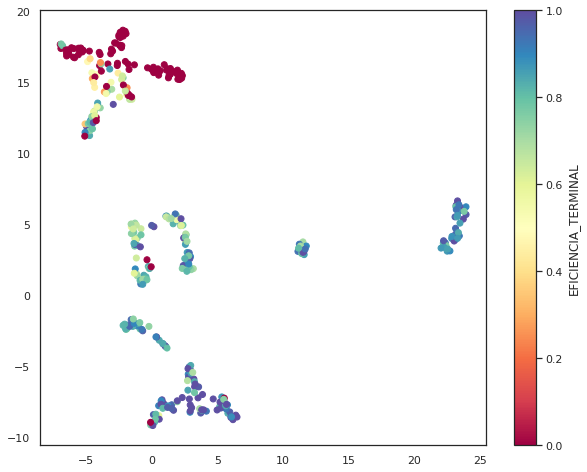

In [204]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
plt.scatter(embedding0[:, 0], embedding0[:, 1], c=labels,  cmap='Spectral');
cbar = plt.colorbar()
cbar.set_label('EFICIENCIA_TERMINAL')
plt.savefig('EFICIENCIA_TERMINAL.png')

In [205]:
counter = collections.Counter(df['NOM_TURNO'].to_list())
counter

Counter({'MATUTINO': 228, 'VESPERTINO': 111, 'DISCONTINUO': 4, 'NOCTURNO': 20})

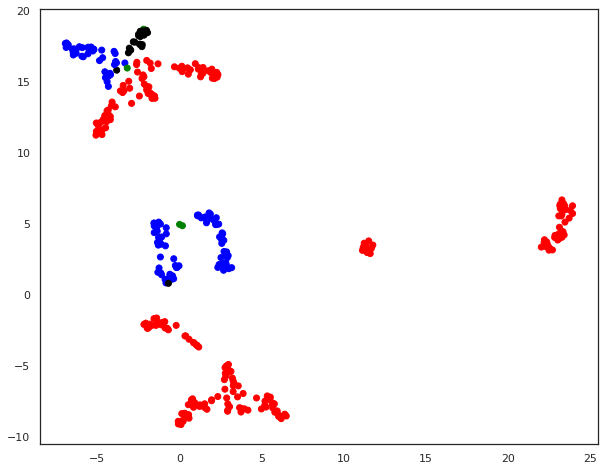

In [206]:
colors = {'MATUTINO':'red', 'VESPERTINO':'blue', 'DISCONTINUO':'green', 'NOCTURNO':'black'}
values = df['NOM_TURNO'].apply(lambda x: colors[x])
scatter = plt.scatter(embedding0[:, 0], embedding0[:, 1], c=values,  cmap='Spectral');
plt.savefig('turnos.png')

In [207]:
counter = collections.Counter(df['SOSTENIMIENTO'].to_list())
counter

Counter({'FEDERALIZADO': 59, 'ESTATAL': 94, 'PARTICULAR': 205, 'FEDERAL': 5})

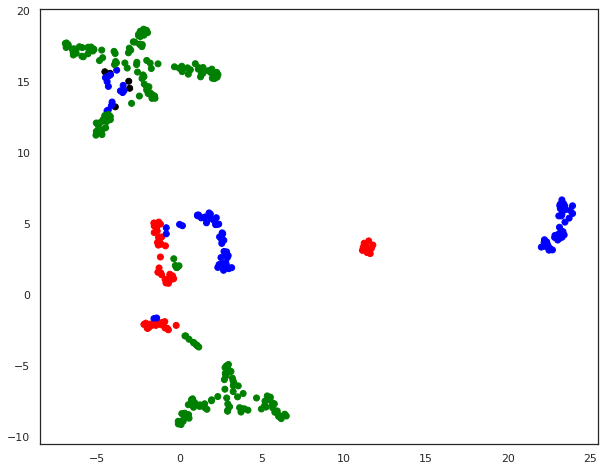

In [208]:
colors = {'FEDERALIZADO':'red', 'ESTATAL':'blue', 'PARTICULAR':'green', 'FEDERAL':'black'}
values = df['SOSTENIMIENTO'].apply(lambda x: colors[x])
scatter = plt.scatter(embedding0[:, 0], embedding0[:, 1], c=values,  cmap='Spectral');
plt.savefig('sostenimiento.png')

In [154]:
counter = collections.Counter(df['NIVEL'].to_list())
counter


Counter({'SECUNDARIA': 229, 'BACHILLERATO': 132, 'PROFESIONAL TECNICO': 2})

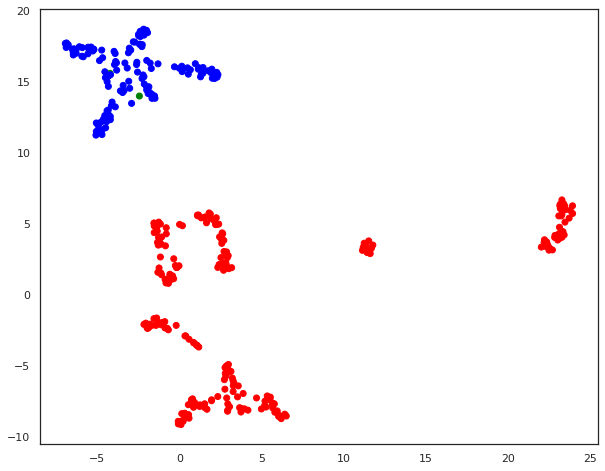

In [215]:
colors = {'SECUNDARIA':'red', 'BACHILLERATO':'blue', 'PROFESIONAL TECNICO':'green'}
values = df['NIVEL'].apply(lambda x: colors[x])
scatter = plt.scatter(embedding0[:, 0], embedding0[:, 1], c=values,  cmap='Spectral');
plt.savefig('nivel.png')

In [211]:
counter = collections.Counter(df['PROGRAMA'].to_list())
counter

Counter({'GENERAL': 211,
         'TECNICA': 44,
         'TELESECUNDARIA': 2,
         'PROFESIONAL MEDIO': 2,
         'TECNOLOGICO': 31,
         'BIS NO ESC': 73})

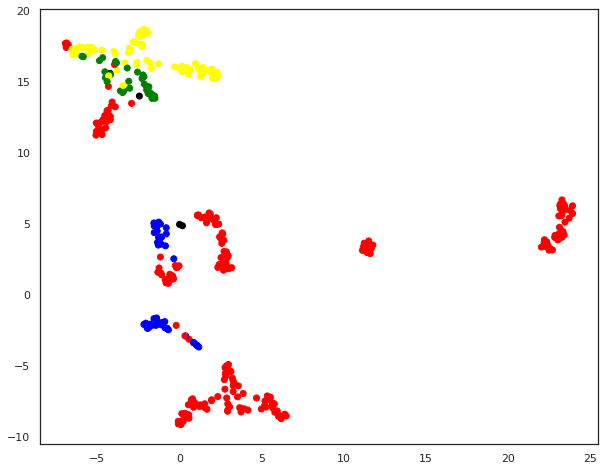

In [216]:
colors = {'GENERAL':'red', 'TECNICA':'blue', 'TECNOLOGICO':'green','BIS NO ESC':'yellow','TELESECUNDARIA':'black','PROFESIONAL MEDIO':'black'}
values = df['PROGRAMA'].apply(lambda x: colors[x])
scatter = plt.scatter(embedding0[:, 0], embedding0[:, 1], c=values,  cmap='Spectral');
plt.savefig('PROGRAMA.png')

In [ ]:
#DESERCION_INTRACURRICULAR	REPROBACION	REPROBACION_CON_REGULARIZADOS	

In [219]:
labels = (df["REPROBACION"]).to_list() 

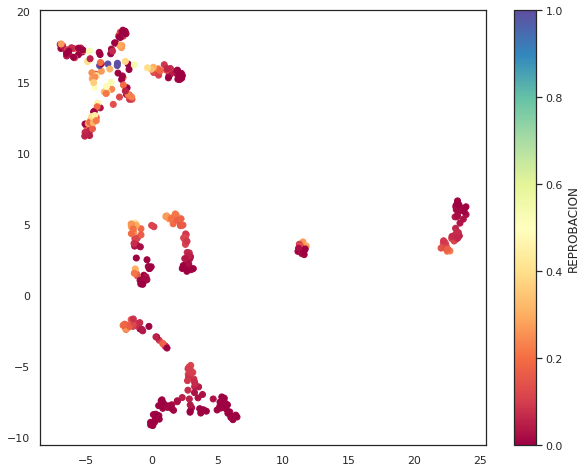

In [220]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
plt.scatter(embedding0[:, 0], embedding0[:, 1], c=labels,  cmap='Spectral');
cbar = plt.colorbar()
cbar.set_label('REPROBACION')
plt.savefig('REPROBACION.png')

### SEGUNDO SUBSET (Sin Reprobación Regularizada)

In [99]:
df_2 = pd.read_csv(data[1])
df_2.head()

,NOM_TURNO,COLONIA,SOSTENIMIENTO,NIVEL,PROGRAMA,DESERCION_INTRACURRICULAR,REPROBACION,EFICIENCIA_TERMINAL
0,MATUTINO,0,FEDERALIZADO,PRIMARIA,GENERAL,0.0294,0.013,0.9367
1,VESPERTINO,9418,FEDERALIZADO,PRIMARIA,GENERAL,0.0000,0.000,1.0000
2,MATUTINO,9400,FEDERALIZADO,PRIMARIA,GENERAL,0.0000,0.000,0.7368
3,MATUTINO,9359,FEDERALIZADO,PRIMARIA,GENERAL,0.0000,0.000,1.0000
4,MATUTINO,9359,FEDERALIZADO,PRIMARIA,GENERAL,0.0528,0.000,1.0000


In [101]:
labels_2 = (df_2.iloc[:,-1]).to_list()
df_2.pop("EFICIENCIA_TERMINAL")

0       0.9367
1       1.0000
2       0.7368
3       1.0000
4       1.0000
         ...  
1034    0.0000
1035    0.0000
1036    0.5994
1037    0.6463
1038    0.3882
Name: EFICIENCIA_TERMINAL, Length: 1039, dtype: float64

In [102]:
df_2.head()

,NOM_TURNO,COLONIA,SOSTENIMIENTO,NIVEL,PROGRAMA,DESERCION_INTRACURRICULAR,REPROBACION
0,MATUTINO,0,FEDERALIZADO,PRIMARIA,GENERAL,0.0294,0.013
1,VESPERTINO,9418,FEDERALIZADO,PRIMARIA,GENERAL,0.0000,0.000
2,MATUTINO,9400,FEDERALIZADO,PRIMARIA,GENERAL,0.0000,0.000
3,MATUTINO,9359,FEDERALIZADO,PRIMARIA,GENERAL,0.0000,0.000
4,MATUTINO,9359,FEDERALIZADO,PRIMARIA,GENERAL,0.0528,0.000


In [103]:
matrix2 = gower.gower_matrix(df_2)

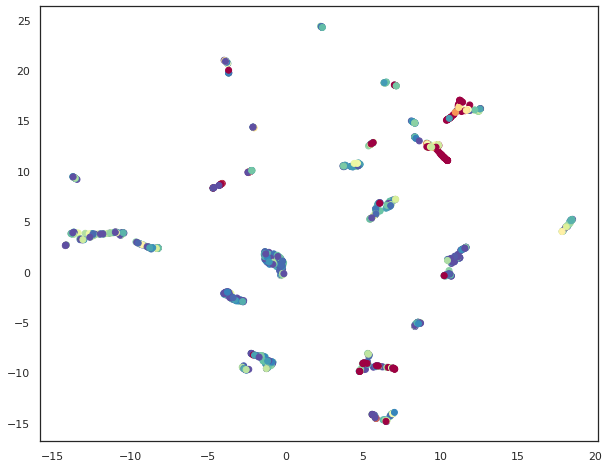

In [107]:
embedding2 = umap.UMAP().fit_transform(matrix2)
sns.set(style='white', rc={'figure.figsize':(10,8)})
plt.scatter(embedding2[:, 0], embedding2[:, 1], c=labels_2,  cmap='Spectral');